In [13]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [15]:
# Step 1: Training data (Age vs Whether they buy a product)

X = np.array([[18], [20], [22], [30], [35], [40], [50]])  # Age (input)
y = np.array([0, 0, 0, 1, 1, 1, 1])  # Buy? (0 = No, 1 = Yes) - output

In [16]:
# Step 2: Create and train the logistic regression model

model = LogisticRegression()
model.fit(X, y)  # Learn the relationship between Age and Buy

LogisticRegression()

In [17]:
# Step 3: Predict for age 28

age = 28
prediction = model.predict([[age]])           # Class prediction (0 or 1)
probability = model.predict_proba([[age]])    # Probability of class

In [19]:
# Step 4: Output result

print(f"Will {age}-year-old buy the product? {'Yes' if prediction[0] == 1 else 'No'}")
print(f"Probability of buying: {probability[0][1]:.2f}")

# probability = model.predict_proba([[28]])
# print(probability) 
# might give [[0.23, 0.77]]  [prob of class 0, prob of class 1]

# 0.27 → Probability that the person won’t buy (class 0)
# 0.73 → Probability that the person will buy (class 1)

# The outer list represents each sample you gave the model (in this case, 1 person with age 28).
# probability[0][0] → probability of class 0 (No), which is 0.23
# probability[0][1] → probability of class 1 (Yes), which is 0.77

# probability[0] → gets the list [0.23, 0.77] (the probabilities for that one person)
# Then probability[0][1] → gets the second value, which is the probability of class 1 (Yes)


Will 28-year-old buy the product? Yes
Probability of buying: 0.77


In [20]:
# Step 5: Visualize the sigmoid curve

# Create age range from 15 to 55
X_test = np.linspace(15, 55, 300).reshape(-1, 1)  
# Creates 300 evenly spaced numbers from 15 to 55 using np.linspace.
# These numbers represent ages (like 15, 15.13, 15.26, ..., 55).
# .reshape(-1, 1) changes the shape from (300,) to (300, 1) to match the format that scikit-learn expects (2D input).

# (300,) is just 1D array (just value)
# (300,1) is 2D array (300 rows, 1 column) which the scikit-learn models expect

In [22]:
# Step 5: Visualize the sigmoid curve

y_proba = model.predict_proba(X_test)[:, 1]      # Probabilities for class "1" (Buy)
# Feeds all those 300 ages into the model with predict_proba(X_test)
# This returns a 2D array of shape (300, 2) with probabilities:
# [:, 0] → Probability of class 0 (Not Buying)
# [:, 1] → Probability of class 1 (Buying)
# We extract only [:, 1] — the probability of buying (class 1) — because that’s what we want to plot on the Y-axis of our sigmoid curve.

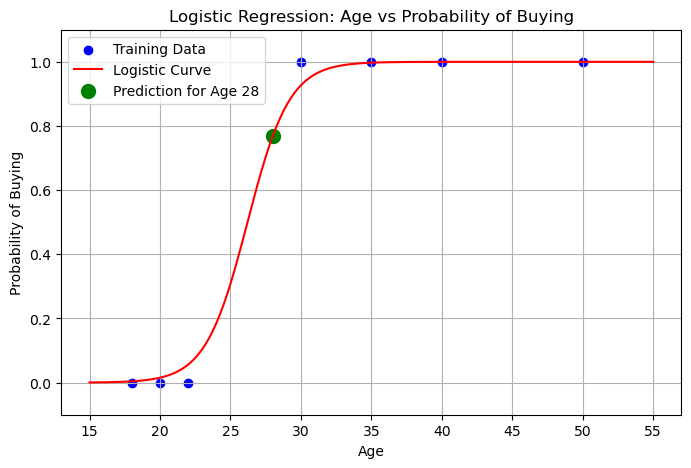

In [23]:
# Step 6: Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Training Data')  # Original data points
plt.plot(X_test, y_proba, color='red', label='Logistic Curve')  # Sigmoid curve
plt.scatter([[age]], probability[:, 1], color='green', s=100, label=f'Prediction for Age {age}')  # Prediction point

# Use probability[0][1] when you just need the number.
# Use probability[:, 1] when plotting or working with multiple values.

# Add labels and show plot
plt.title("Logistic Regression: Age vs Probability of Buying")
plt.xlabel("Age")
plt.ylabel("Probability of Buying")
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1) # Set the y-axis range limit from (-0.1, 1.1)
plt.show()